# 1 Perceptrons

## 1.1 Importing Libraries and Loading Data

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## 1.2 Generating data

In [2]:
n_samples = 200
cluster_1_centre = [2,2]
cluster_2_centre = [6,6]
spread = 1

data,labels = make_blobs(n_samples=n_samples, centers=(cluster_1_centre, cluster_2_centre), cluster_std=spread, random_state=0)

In [3]:
data[0:5]

array([[4.26975462, 0.54563433],
       [6.27451636, 5.10908492],
       [2.06651722, 2.3024719 ],
       [0.77456448, 2.84436298],
       [1.19659034, 1.31045022]])

In [4]:
labels[0:5]

array([0, 1, 0, 0, 0])

In [5]:
colours = ('green', 'red')

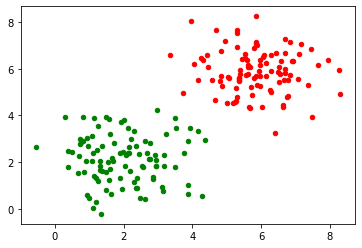

In [6]:
fig,ax = plt.subplots()
for n_class in range(2):
    plt.scatter(data[labels==n_class][:,0],data[labels==n_class][:,1],c=colours[n_class],s=20,label=str(n_class))

## 1.3 Human Powered Perception

In [7]:
theta_0 = -4
theta_1 = 2.3
theta_2 = 4.2

In [8]:
net_input = theta_0+theta_1*data[:,0]+theta_2*data[:,1]
classification = list(map(lambda x:1 if x>0 else 0, net_input))

In [9]:
print(classification)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [10]:
number_correct = sum(x==y for x,y in zip(labels, classification))
number_correct

103

In [11]:
score = number_correct/n_samples
score

0.515

## 1.4 Using sklearn to fit the perceptron

In [12]:
from sklearn.model_selection import train_test_split
datasets = train_test_split(data, labels, test_size=0.2)
train_data, test_data, train_labels, test_labels = datasets

In [13]:
from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42, max_iter=500, tol=1)
p.fit(train_data, train_labels);

In [14]:
print('theta_1 =',p.coef_[0][0])
print('theta_2 =',p.coef_[0][1])

theta_1 = 4.423732140750222
theta_2 = 5.126100696055874


In [15]:
print('theta_0 =', p.intercept_[0])

theta_0 = -36.0


In [16]:
from sklearn.metrics import accuracy_score

prediction_train = p.predict(train_data)
prediction_test = p.predict(test_data)

train_score = accuracy_score(prediction_train, train_labels)
print("score on train data:", train_score)
test_score = accuracy_score(prediction_test, test_labels)
print("score on test data: ", test_data)

score on train data: 1.0
score on test data:  [[6.56729028 5.7773249 ]
 [6.68981816 7.30184623]
 [4.81114074 5.49318365]
 [6.52106488 5.42421203]
 [1.50196755 3.92953205]
 [5.52034419 6.6203583 ]
 [5.31216239 4.7859226 ]
 [1.61267318 1.69769725]
 [7.15233156 7.07961859]
 [6.03863055 4.3432849 ]
 [2.3563664  2.70657317]
 [5.88945934 7.02017271]
 [5.95782855 5.71311281]
 [4.38314477 2.94447949]
 [5.18663574 4.53357567]
 [1.25524518 1.17356146]
 [1.65208785 2.15634897]
 [6.84163126 5.75054142]
 [1.18685372 0.2737174 ]
 [5.044055   5.65401822]
 [3.86755896 2.90604466]
 [2.01050002 3.78587049]
 [5.80934651 5.60515049]
 [1.49034782 1.5619257 ]
 [3.96931553 8.06449286]
 [5.3159891  7.6595508 ]
 [2.20827498 2.97663904]
 [2.15494743 2.37816252]
 [3.8831507  0.65224094]
 [0.95144703 0.57998206]
 [5.30795015 7.53637705]
 [4.95474663 7.21114529]
 [0.74720464 2.77749036]
 [5.70816264 5.23850779]
 [5.29529972 6.94326072]
 [6.39904635 3.22740724]
 [3.53277921 3.46935877]
 [2.29823817 3.3263859 ]
 [0.

# 2 Keras and Deep Neural Networks

In [17]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'tensorflow'